Import heartbeat data from PASCO -- 
This is a working version using pandas. took me some time to figure out little issues.
decided for now that fft is simpler when using arrays of data. Had difficulty getting it to work with pandas -- update: it wasn't actually that hard. saved with ending '-pasco'

In [67]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
# from matplotlib import interactive
# interactive(True)
%matplotlib nbagg

In [68]:
# load data file
df = pd.read_csv('2018_02 RPS heartbeat.csv',skiprows=1)
df

,Date and Time,Time (s),Voltage (mV),Heart Rate (beats/min)
0,02/13/2018 10:35:01 am,0.000,0.000,NaN
1,02/13/2018 10:35:01 am,0.005,0.000,NaN
2,02/13/2018 10:35:01 am,0.010,0.000,NaN
3,02/13/2018 10:35:01 am,0.015,0.000,NaN
4,02/13/2018 10:35:01 am,0.020,0.000,NaN
5,02/13/2018 10:35:01 am,0.025,0.000,NaN
6,02/13/2018 10:35:01 am,0.030,0.000,NaN
7,02/13/2018 10:35:01 am,0.035,0.000,NaN
8,02/13/2018 10:35:01 am,0.040,0.000,NaN
9,02/13/2018 10:35:01 am,0.045,0.000,NaN


In [3]:
df.index = df['Time (s)']
time_sec = df['Time (s)']
voltage_mV = df['Voltage (mV)']  #.astype(float)
df.index

Float64Index([   0.0,  0.005,   0.01,  0.015,   0.02,  0.025,   0.03,  0.035,
                0.04,  0.045,
              ...
              37.305,  37.31, 37.315,  37.32, 37.325,  37.33, 37.335,  37.34,
              37.345,  37.35],
             dtype='float64', name='Time (s)', length=7471)

In [4]:
# sometimes required to force data to be a float...
# time_sec = df['Run #1.1'].astype(float)
# voltage_mV = df['Run #1.2'].astype(float)

<IPython.core.display.Javascript object>


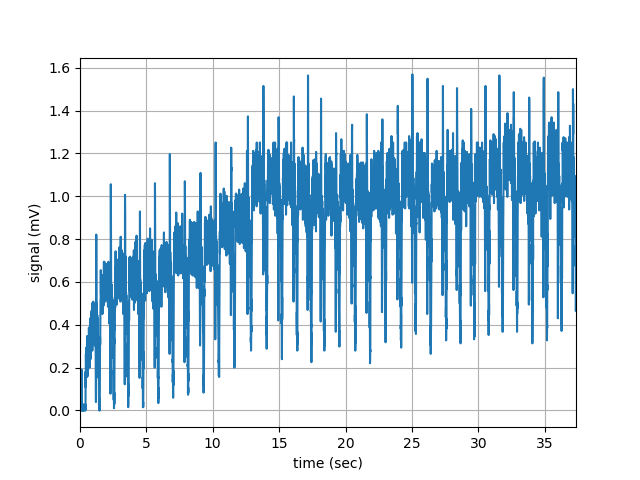

In [5]:
voltage_mV.plot()
plt.ylabel('signal (mV)')
plt.xlabel('time (sec)')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


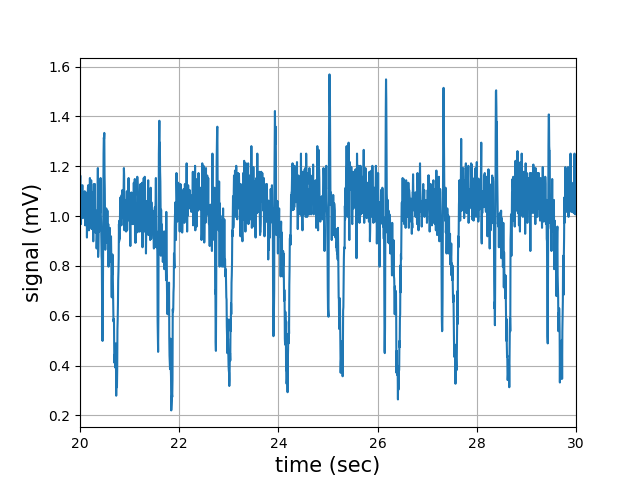

In [56]:
start_time, stop_time = 20, 30

# start_time_idx = np.where(time_sec > start_time)[0][0]
# stop_time_idx = np.where(time_sec > stop_time)[0][0]
# x_ROI = df.index[start_time_idx:stop_time_idx]
# y_ROI = voltage_mV[start_time_idx:stop_time_idx]

x_ROI = time_sec[start_time:stop_time]
y_ROI = voltage_mV[start_time:stop_time]

# plt.plot(x_ROI,y_ROI)  # this works too
y_ROI.plot() 
plt.grid()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (mV)',fontsize=15)
plt.show()

<IPython.core.display.Javascript object>


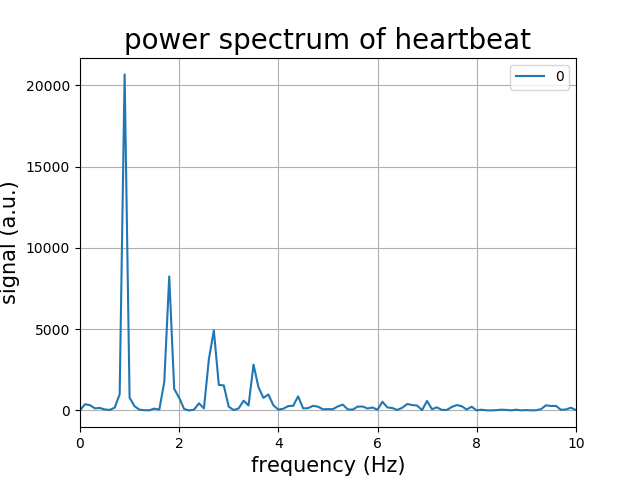

In [66]:
fft_power = pd.DataFrame(np.abs(np.fft.rfft(y_ROI - np.mean(y_ROI)))**2)
DT = df.index[1]-df.index[0]   # sample time
fft_power.index=(np.fft.fftfreq(y_ROI.shape[0])/DT)[0:len(fft)]
fft_power.plot()
plt.xlim([0,10])

title = 'power spectrum of heartbeat'
xaxis_label = 'frequency (Hz)'
yaxis_label = 'signal (a.u.)'

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=20)
# plt.ylim([0,2e2])
# https://stackoverflow.com/questions/43412073/how-do-i-plot-the-output-of-numpy-fft-in-bins

In [58]:
Y_FFT = np.fft.fft(y_ROI - np.mean(y_ROI))
y2 = Y_FFT * np.conjugate(Y_FFT)
pow = abs(y2[0:len(Y_FFT)//2] + y2[:len(Y_FFT)//2:-1])
DT = df.index[1]-df.index[0]   # sample time
freq = (np.fft.fftfreq(y_ROI.shape[0])/DT)[0:len(Y_FFT)//2]


<IPython.core.display.Javascript object>


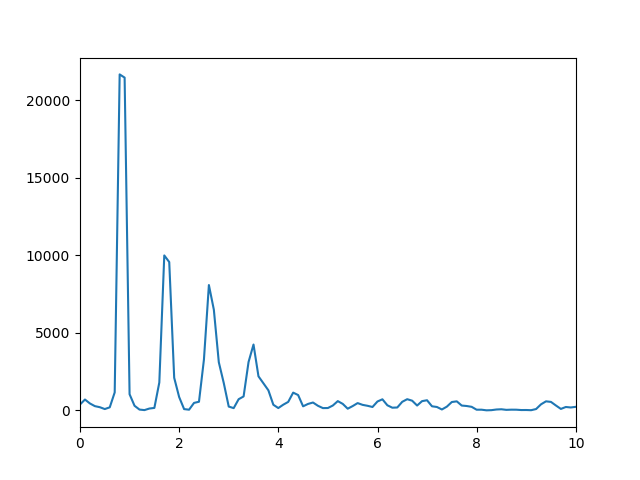

In [59]:
plt.plot(freq,pow)
plt.xlim([0,10])
# plt.ylim([0,2e2])
plt.show()

I'm not sure why my plot this way looks slightly different. I'm not going to worry about it too much...

<IPython.core.display.Javascript object>


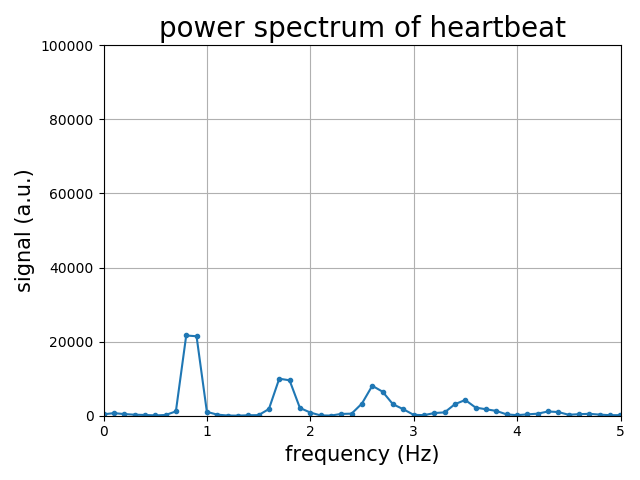

In [60]:
title = 'power spectrum of heartbeat'
xaxis_label = 'frequency (Hz)'
yaxis_label = 'signal (a.u.)'

plt.plot(freq,pow,'.-') #,label='FFT of file '+filename[0:6])

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=20)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.xlim([0,5])
plt.ylim([0,1e5])
# plt.legend(frameon=False,loc='best') 
plt.tight_layout() 
plt.show()
# save the figure as a png file. It will be saved to the same directory as your program.
# plt.savefig('mydata.png',dpi=400)

# save the analyzed data to a text file with a name corresponding to the original filename
# np.savetxt(file_dir+'FFT_'+filename[0:5]+'.txt', (freq,pow), delimiter=',',fmt='%.4e')

<IPython.core.display.Javascript object>


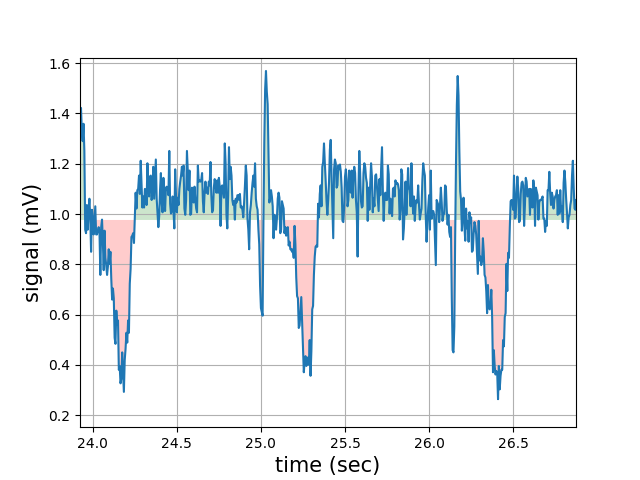

In [61]:
fig, ax = plt.subplots()
ax.plot(y_ROI)
# y_ROI.plot()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (mV)',fontsize=15)
plt.grid()    # y_ROI - np.mean(y_ROI)
# plt.fill_between(where=df['accelerometerAccelerationZ(G)'] < -1,facecolor='blue', alpha=0.5)
# d = df['date1'].values
# # plt.fill_between(d, 0, df['accelerometerAccelerationZ(G)'],
# #                 where=df['accelerometerAccelerationZ(G)'] >= -1,
# #                 facecolor='green', alpha=0.2, interpolate=True)
# ax.fill_between(df.index, -1,df['accelerometerAccelerationZ(G)'],
#                 where=df['accelerometerAccelerationZ(G)'] >= -1,
#                 acecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI),y_ROI,
                where=y_ROI >= np.mean(y_ROI),
                facecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI),y_ROI,
                where=y_ROI < np.mean(y_ROI),
                facecolor='red', alpha=0.2, interpolate=True)
# ax.fill_between(df.index, -1,df['accelerometerAccelerationZ(G)'],
#                 where=df['accelerometerAccelerationZ(G)'] < -1,
#                 facecolor='red', alpha=0.2, interpolate=True)
plt.show()


In [64]:
np.mean(y_ROI)

0.9765792103948031

<IPython.core.display.Javascript object>


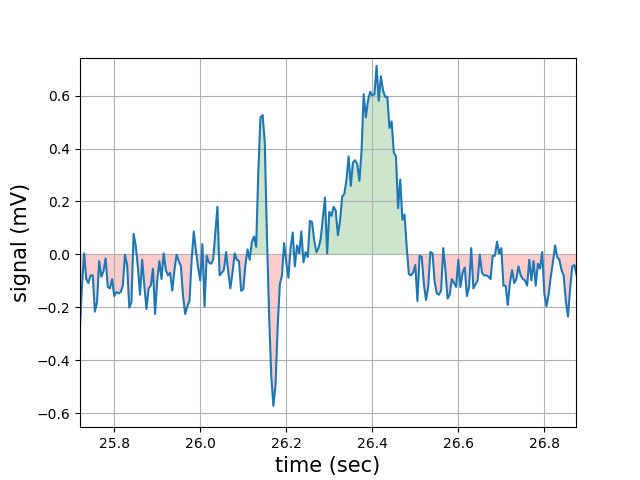

In [65]:
y_ROI_flipped = -(y_ROI - np.mean(y_ROI))


fig, ax = plt.subplots()
ax.plot(x_ROI,y_ROI_flipped)
# y_ROI.plot()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (mV)',fontsize=15)
plt.grid()    # y_ROI - np.mean(y_ROI)
# plt.fill_between(where=df['accelerometerAccelerationZ(G)'] < -1,facecolor='blue', alpha=0.5)
# d = df['date1'].values
# # plt.fill_between(d, 0, df['accelerometerAccelerationZ(G)'],
# #                 where=df['accelerometerAccelerationZ(G)'] >= -1,
# #                 facecolor='green', alpha=0.2, interpolate=True)
# ax.fill_between(df.index, -1,df['accelerometerAccelerationZ(G)'],
#                 where=df['accelerometerAccelerationZ(G)'] >= -1,
#                 acecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI_flipped),y_ROI_flipped,
                where=y_ROI_flipped >= np.mean(y_ROI_flipped),
                facecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI_flipped),y_ROI_flipped,
                where=y_ROI_flipped < np.mean(y_ROI_flipped),
                facecolor='red', alpha=0.2, interpolate=True)
plt.show()